# Data Cleaning

## Loading Data

In [203]:
import pandas as pd

data = pd.read_csv('../data/raw/abalone-1.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [204]:
# Adding age to the dataset
data['Age'] = data['Rings'] + 1.5

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## Descriptive Stats

In [205]:
print("Data Info:")
print(data.info())

print("\n\nDescriptive Statistics:")
print(data.describe())

print("\n\nMissing Values:")
print(data.isnull().sum())

print("\nNumber of duplicate rows:", data.duplicated().sum())

print("\n\nTotal Columns and Rows:")
print(data.shape)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None


Descriptive Statistics:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.1

In [206]:
#Changed Sex column to numeric values M = 0, F = 1, I = 2
if data['Sex'].dtype == 'object':
    data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})

data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [207]:
# Checking For Duplicates
print('Duplicated Rows: ', data.duplicated().sum())

Duplicated Rows:  0


In [208]:
# Checking for null values
print('Null Values: ', data.isnull().sum().sum())

Null Values:  0


### Comments

#### Overview
- Data contains 4177 entries, with 9 columns
- There are no null values in all the columns
- There are no duplicate rows
- Minimum Values for height is 0, which is an anamoly, so need to recheck

#### Next Steps
- Explore measurement values, to detect more anamolies (e.g if there are any 0 or negative values)

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Array of continuous variables
continuous_vars = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 2
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


In [210]:
#Removing rows with 0 or negative values in continuous variables
data = data[(data[continuous_vars] > 0).all(axis=1)]

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())
    

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 0
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


## Visualizing Continuos Variables

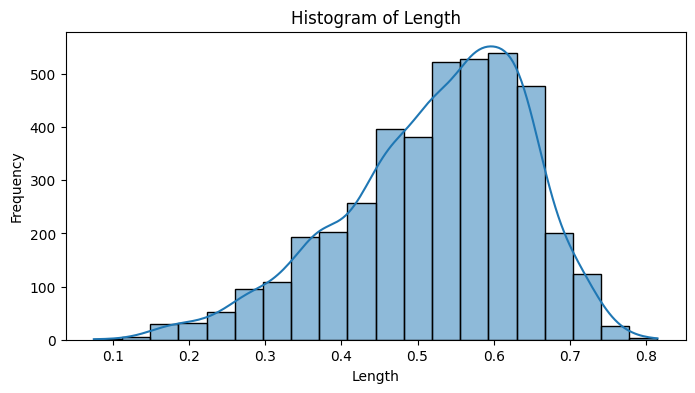

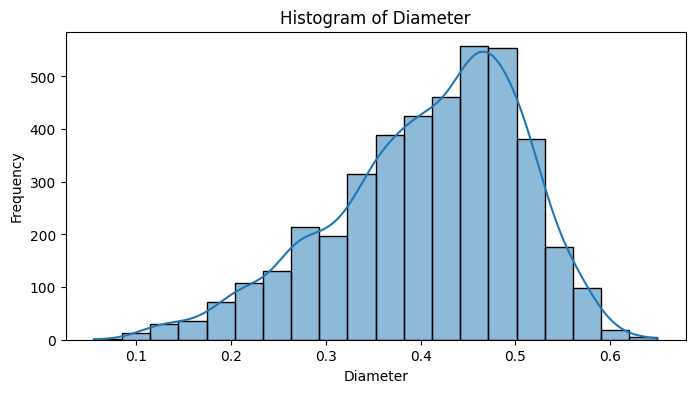

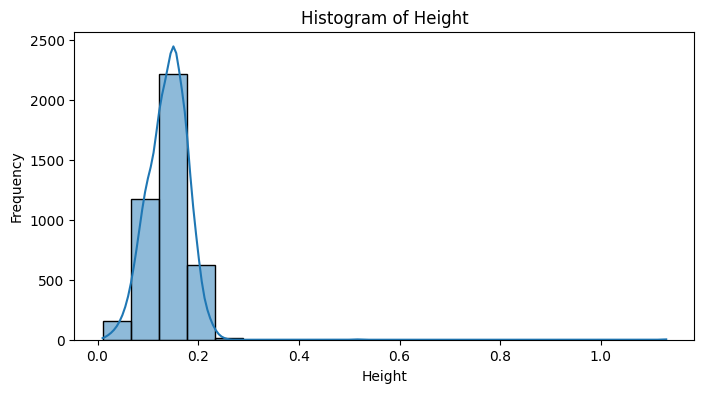

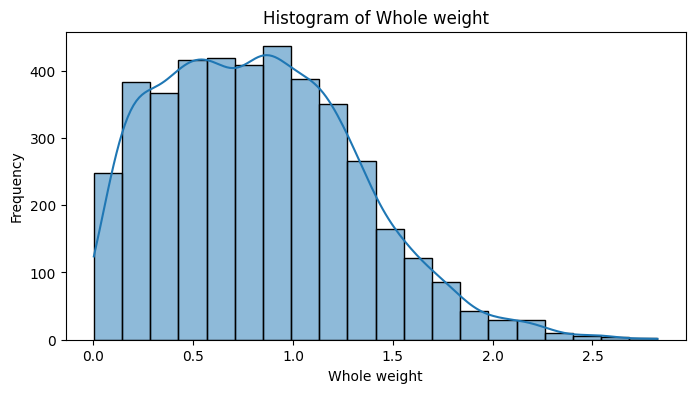

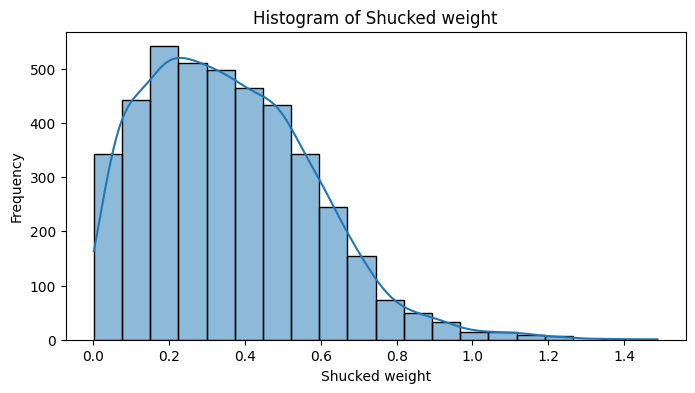

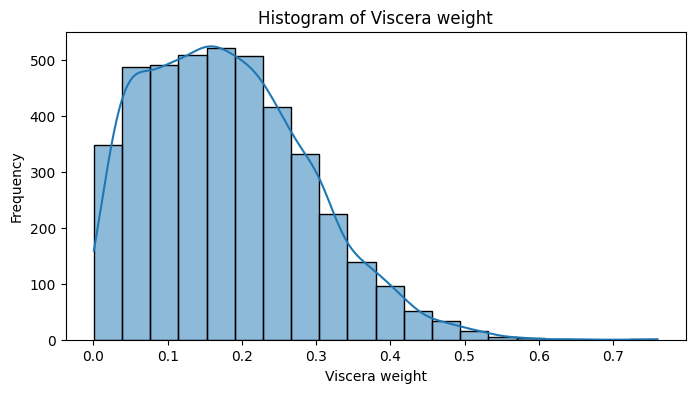

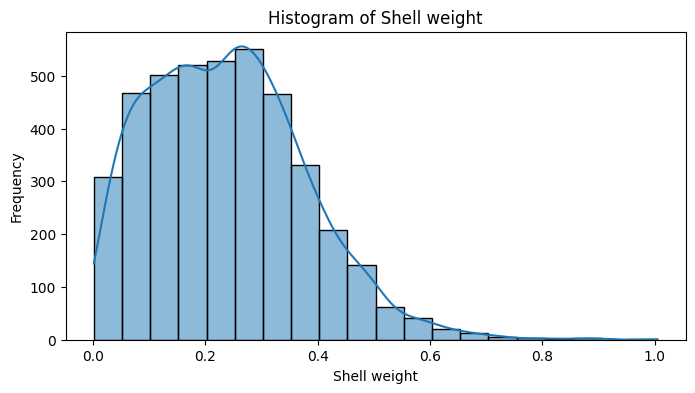

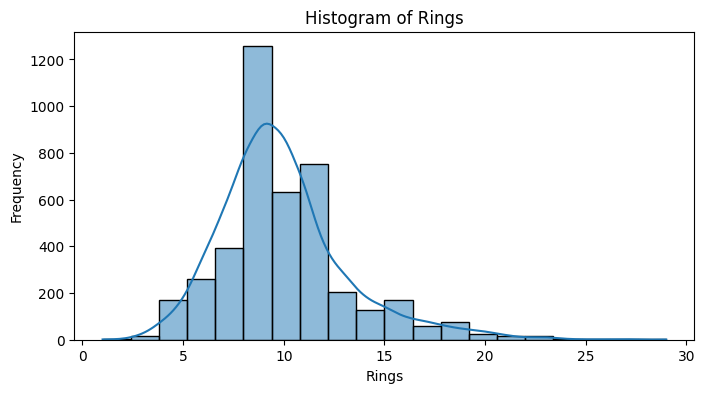

In [211]:


for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


### Comments

### Histogram
- Nothing seems to be drastically incorrect. There is visibile skewness, but it is normal in biological dataset

#### Next Steps
- Now we will visualise these variables in Box Plot to visualise any extreme outliers

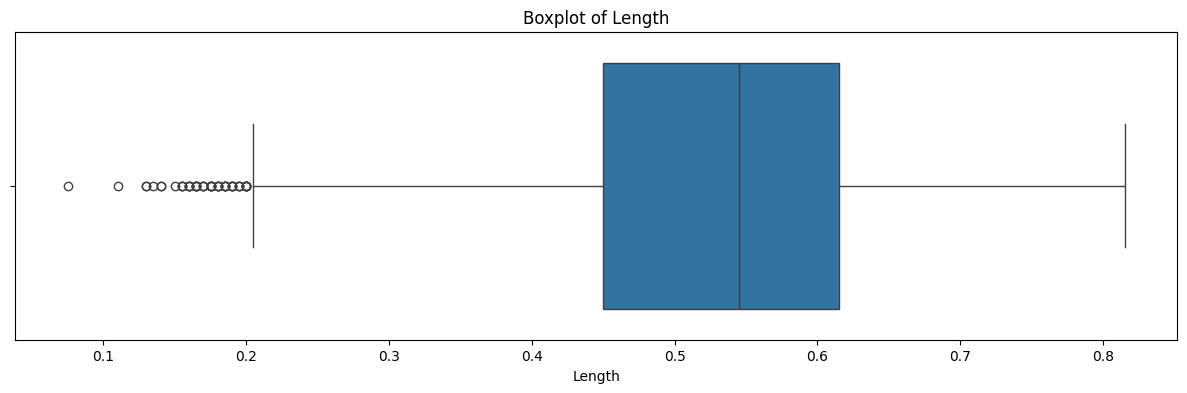

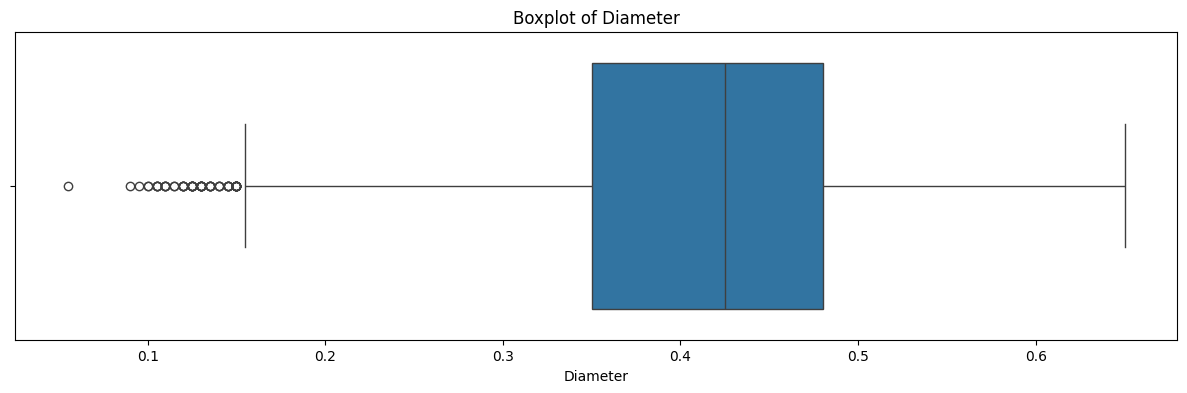

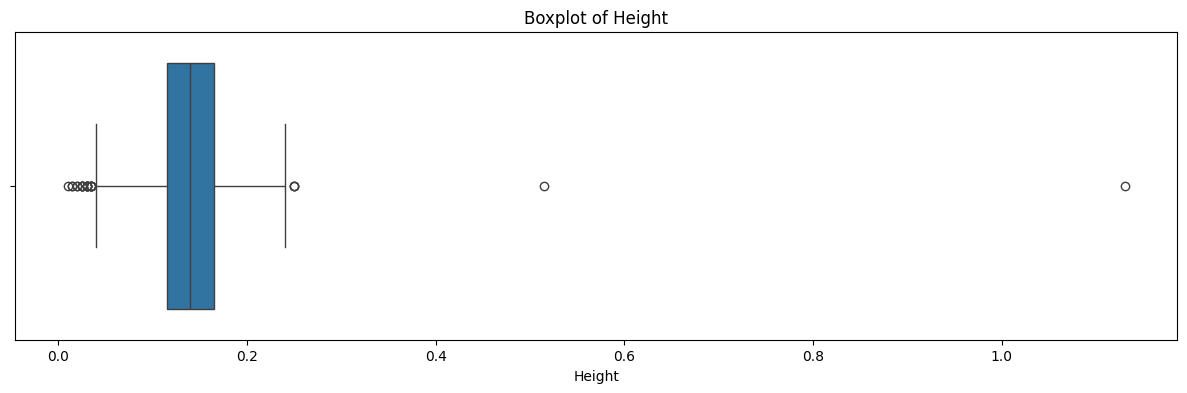

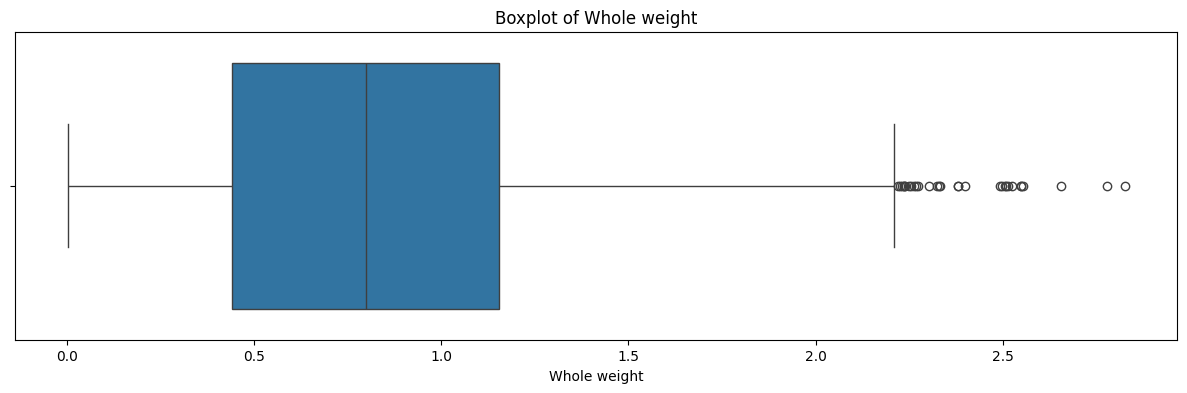

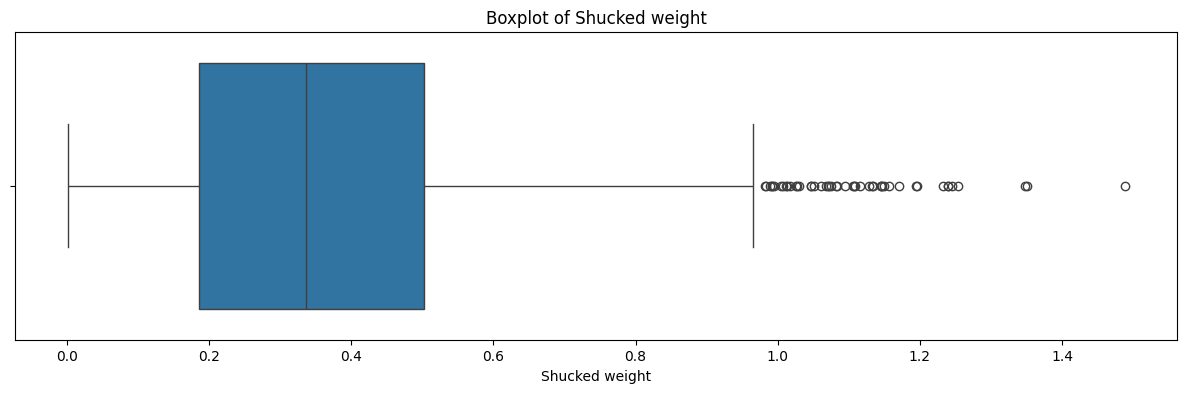

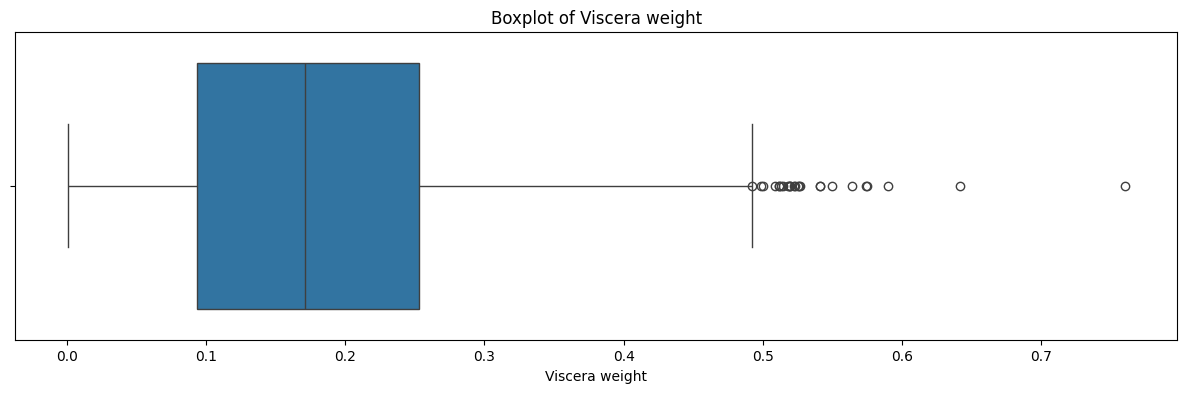

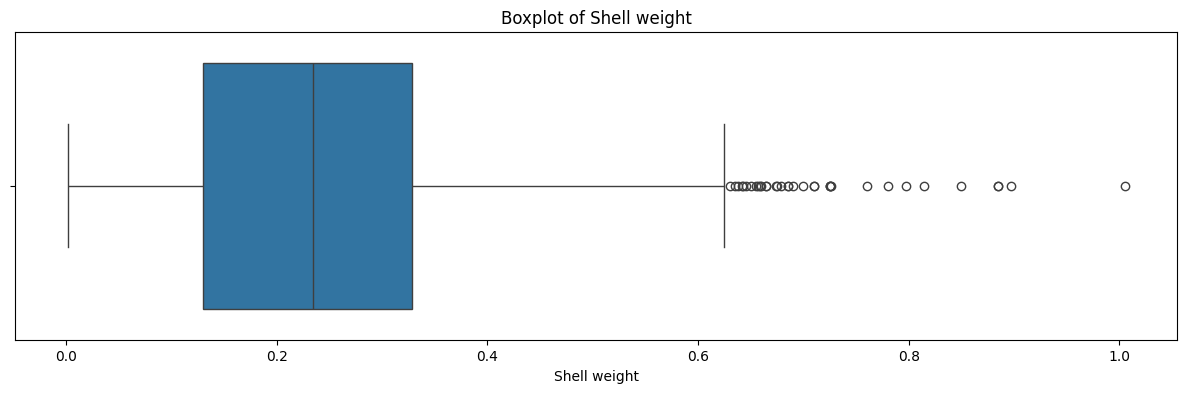

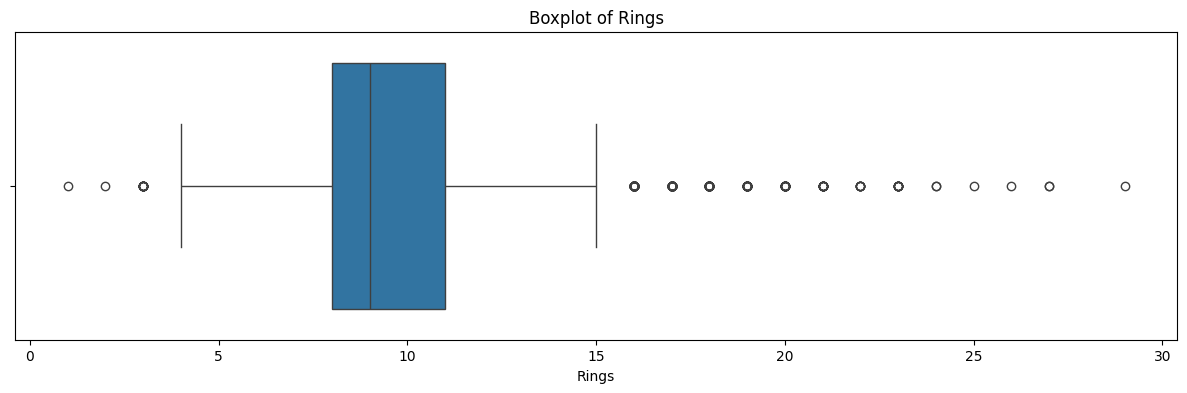

In [212]:
# Creating Boxplots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(15, 4))
    sns.boxplot(x=data[var])
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)
    plt.show()

In [213]:
#Investigating the values of those 2 rows
print(data[data['Height'] > 0.4])


      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1417    0   0.705     0.565   0.515         2.210          1.1075   
2051    1   0.455     0.355   1.130         0.594          0.3320   

      Viscera weight  Shell weight  Rings   Age  
1417          0.4865        0.5120     10  11.5  
2051          0.1160        0.1335      8   9.5  


Nothing unusual found between variables above

<Axes: xlabel='Height'>

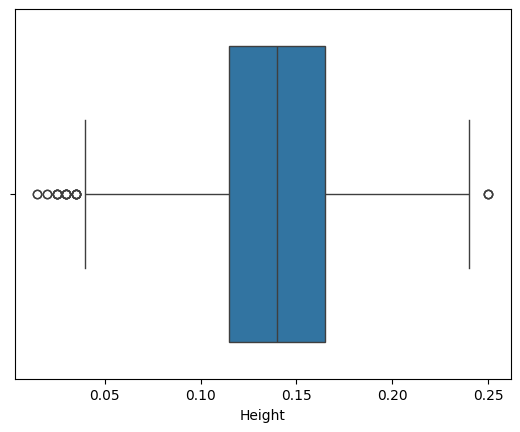

In [214]:

# Removing outliers using z-score
from scipy.stats import zscore

z_scores = zscore(data['Height'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

sns.boxplot(x=data['Height'])


### Comment

- Although there were outliers present in the dataset, most of it was noise.
- There was extreme outliers present in Height, which was removed using Z-score method, due to height being normally distributed

In [215]:
data.shape[0]


4172

In [216]:
data.shape[0]

4172

In [217]:
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5


In [218]:
cleaned_data = data.copy()

In [219]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)


## Conclusions

### Data Overview
- The dataset contains 4173 entries with 10 columns.
- After cleaning, the dataset was reduced to 4168 entries.
- The columns include measurements of abalone and their respective ages.

### Data Cleaning
- No null values were present in the dataset.
- Duplicate rows were not found.
- Rows with 0 or negative values in continuous variables were removed.
- Extreme outliers in the `Height` column were identified and removed using a Z-Score method

### Statistical Insights
- Descriptive statistics revealed skewness in some continuous variables, which is expected in biological datasets.
- The `Height` column had extreme outliers, which were addressed to improve data quality.

### Visualizations
- Histograms of continuous variables showed normal distributions with some skewness.
- Boxplots highlighted the presence of outliers, particularly in the `Height` column.

### Final Dataset
- The cleaned dataset (`cleaned_data`) is ready for further analysis, with 4168 rows and 10 columns.
- The dataset now contains only valid and meaningful data points, ensuring better reliability for modeling and insights.

In [220]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)

# Data Exploration

### Histogram

<Axes: xlabel='Length', ylabel='Count'>

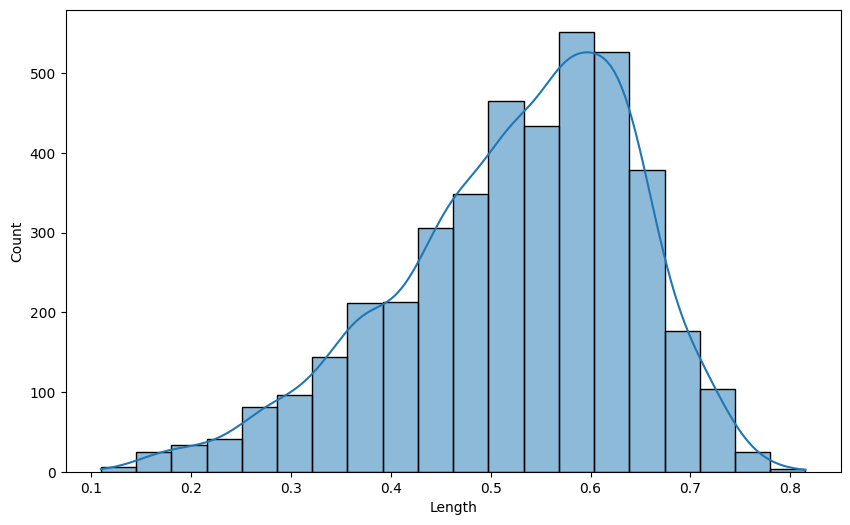

In [221]:
plt.figure(figsize=(10, 6))

#Histogram of Length
sns.histplot(data['Length'], bins=20, kde=True)

Comments

- Slightly Skewed to the right
- Single Peak at around 0.567 - 0.6

### Box Plot

<Axes: xlabel='Length'>

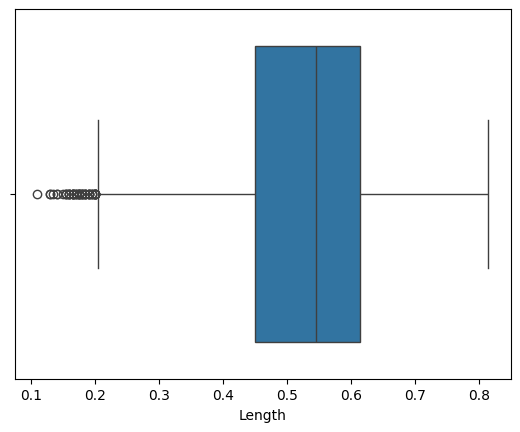

In [222]:
#Boxplot of Length
sns.boxplot(x=data['Length'])

In [223]:
data['Length'].describe()

count    4172.000000
mean        0.524145
std         0.119873
min         0.110000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

Comments

- Most of the data lies between 0.11 ( min) to 0.815 (max)
- There is outliers (according to IQR method), however there is good amount of data present, therefore it could be a type of species, etc. We can explore and investigate further.


### Pair Plot

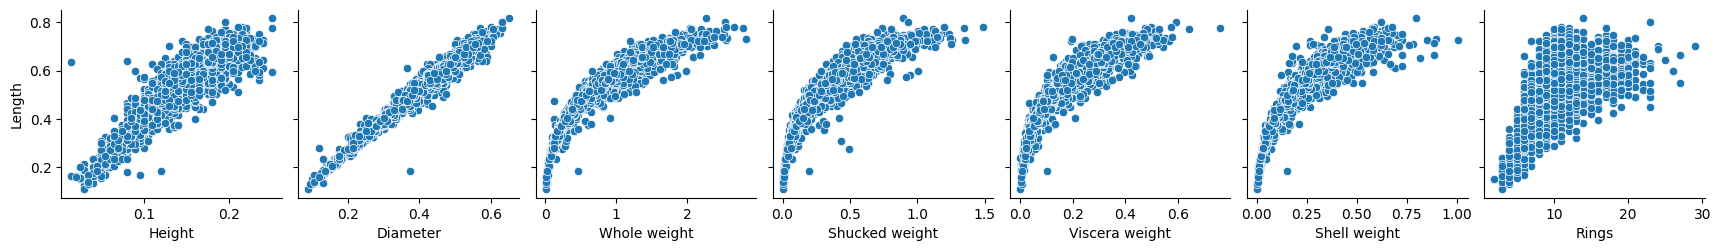

In [224]:

#Pair Plot of height with other variables
sns.pairplot(data, y_vars=['Length'], x_vars=['Height', 'Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'], kind='scatter')

Comments

- Very Strong correlation between Length and Diameter (0.987), almost 1:1. This means as Diameter increases, Length almost increases proportinally.
- There is also strong correlation between Length and Height (0.9), and Length and Weights (0.899 - 0.926)

In [225]:
# Correlation between Length and other variables

data.corr()['Length']

Sex              -0.447862
Length            1.000000
Diameter          0.986756
Height            0.900583
Whole weight      0.925684
Shucked weight    0.898469
Viscera weight    0.903367
Shell weight      0.898655
Rings             0.555530
Age               0.555530
Name: Length, dtype: float64



### 1b. Comment
* Distribution Observations for Length:
The Length values range from about 0.11 to 0.815, with the histogram revealing a single peak around 0.567 to 0.6. The distribution is slightly skewed to the right, with a tail extending more toward lower values (on the left). Although the IQR method flags some outliers, these points may be due to geniuene variability, potentially indicating natural variation or different species, rather than random noise. Further investigation is needed.

* Correlation Observations:
 There is a very strong correlation between Length and Diameter (0.987), indicating that these measurements increase almost proportionally. Additionally, Length is strongly correlated with Height (0.900) and the weight variables (ranging from 0.899 to 0.926), suggesting that larger abalones tend to be both taller and heavier.



## Exploring Multicollinearity

<Axes: >

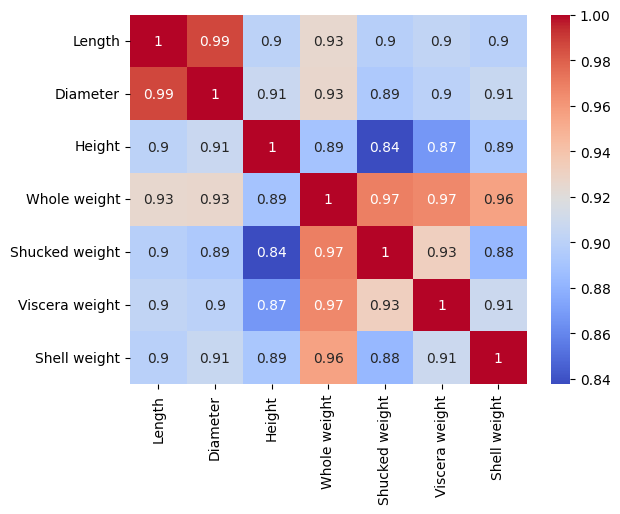

In [226]:
#Predictors for the model are all the columns except the response variable 'Rings'
predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

#Correlation matrix of predictors
corr_matrix = data[predictors].corr() 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### 1c. Evidence of Multicollinearity

#### Observations from the Correlation Heatmap:
##### Extremely High Correlations:
- There is extremely high correlation between `Length` and `Diameter` (0.99), meaning they are almost interchangeable.
- Similarly, `Length` also has high correlations (>= 0.9) with `Height`, and Weight measures
- The weight variables also strongly correlate with each other (> 0.90).
- Overall: All the continuos variables have correlations exceeding 0.84, which is still a high number

##### Implications of this Multicollinearity for regression context:
- Unstable parameter estimation: Where small changes in data can lead to large fluctuations in estimated coefficients.
- Reduced Precision of the estimates: This makes the p-values of hypothesis tests unreliable.

Therefore, including all these highly correlated predictors in a regression model to predict `Rings` would make it difficult in isolating the individual effect of each predictor, so there will be unstable and imprecise parameter estimates.

##### Conclusion:
- The high pairwise correlations among the predictors provide strong evidence of multicollinearity, before the model is fitted. This means, that techniques like Feature Selection or Dimension Reduction (PCA) is necessary to overcome these issues, before fitting the model.

